LES FONDAMENTEAUX POUR LE BIG DATA :
MINI PROJET pour calculer l'estimateur du moindre carré avec une base de données réelles.
Utilisation de Python et la librairie numpy.
Cette étape est importante dans le cadre de l'analyse de données et la modélisation statistique.
Nous pouvons utiliser l'estimateur du moindre carré pour estimer les paramètres d'un modèle statistique (contexte de régression linéaire). La norme des résidus permet d'évaluer à quel point un modèle s'ajuste bien aux données.Une norme faible généralement indique un bon ajustement tandis qu'une norme élevée peut indiquée : des erreurs, des données bruitées (moins fiables, et moins précises), des outliers ou valeurs abberantes...

QUESTION 1
On s'intéresse dans cette question à l'estimateur des moindres carrés.

On rappelle que celui-ci s'écrit de la forme suivante : β^=(X⊤X)−1X⊤*y pour une matrice d'observation X et un vecteur à expliquer y.

Et y=(1,...,1)t∈R8
On choisit y∈R8, et pour X∈R8×8 on prend X=I8+E où la matrice I8 est la matrice identité de taille 8, et E est la matrice partout nulle sauf le dernier élément de la première ligne qui vaut 1 (i.e. E1,8=1)

Utiliser la librairie Numpy pour construire la matrice et calculer la valeur de la somme ∑8i=1βi

In [1]:
import numpy as np
#matrice identity
I8= np.identity(8)
#matrice remplie de zéro
E=np.zeros((8,8))
#je modifie le dernier élément de la première ligne pour qu'il prenne la valeur : 1
E[0,7]=1
X=I8+ E

In [2]:
#y le vecteur de taille 8 contenant les valeurs 1
y=np.ones(8)

In [3]:
#Je calcule l'estimateur des moindres carrés :
#transposé de X
X_transpose=np.transpose(X)
#produit matriciel de X et de X_transpose
XtX=np.dot(X_transpose, X)
#produit matriciel de X_transpose et y
Xty=np.dot(X_transpose, y)
#estimateur des moindres carré
beta_hat=np.dot(np.linalg.inv(XtX), Xty)
#Calcule la somme ∑8i=1 βi
sum_beta=np.sum(beta_hat)

In [4]:
sum_beta

7.0

QUESTION 2
Donner le rang de la matrice X⊤X−I8 (on pourra le faire numériquement en utilisant la fonction np.linalg.eigvals de Numpy) :

In [5]:
matrix_to_rank=XtX-I8
#calcul des valeurs propres de la matrice
eigenvalues=np.linalg.eigvals(matrix_to_rank)
#calcul du rang en comptant les valeurs propres non nulle
rank=np.sum(np.abs(eigenvalues)>1e-10)
rank

2

QUESTION 3
Importer la base de données disponibles http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Créer une matrice Z qui contient les 11 premières colonnes et toutes les lignes du tableau. On prendra pour y le vecteur qui contient la dernière colonne de ce tableau. On aura donc une matrice Z de taille 4898×11.

On reprend l'estimateur des moindres carrés proposé ci-dessus:

β^Z=(Z⊤Z)−1Z⊤y.

Donner la valeur des résidus obtenus: ∥Zβ^Z−y∥22 ?

On ne donnera que la partie entière de ce nombre.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
#import de la base de donnée winequality :
df=pd.read_csv('winequality.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

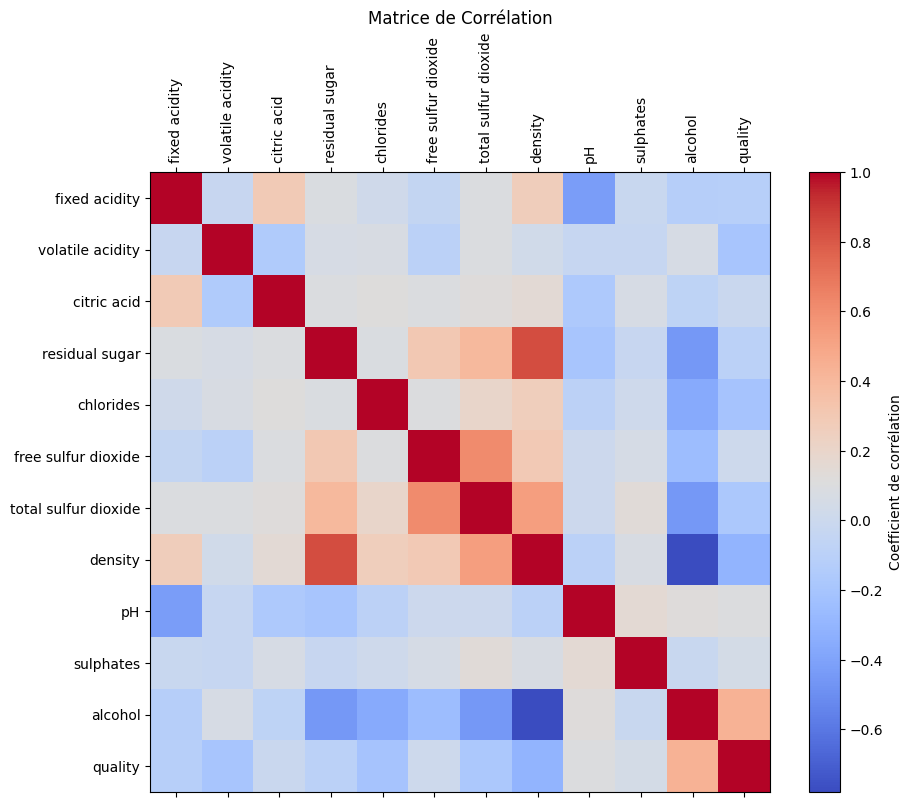

In [18]:
#Tableau de corrélation :
correlation_matrix=df.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar(label='Coefficient de corrélation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de Corrélation')
plt.show()

In [9]:
#Création de la matrice
Z=df.iloc[:, :-1].to_numpy()
Z.shape

(4898, 11)

In [10]:
#Extraction vecteur y
y=df.iloc[:,-1].to_numpy()
y.shape

(4898,)

In [11]:
#Calcul de l'estimateur des moindres carré :
#transposé de Z
Z_transpose=np.transpose(Z)
#produit matriciel de Z et de Z_transpose
ZtZ=np.dot(Z_transpose, Z)
#produit matriciel de Z_transpose et y
Zty=np.dot(Z_transpose, y)
#estimateur des moindres carré
beta_hat_Z = np.dot(np.linalg.inv(ZtZ), Zty)
#Calcul des résidus:
residus = np.dot(Z, beta_hat_Z) - y
print(residus)
#Calcul de la norme ℓ₂² des résidus:
norme_residus_carre = np.linalg.norm(residus, ord=2)**2
print(norme_residus_carre)

[-0.39801466 -0.70815697 -0.32887745 ... -0.60797479 -0.42924447
  0.31167295]
2794.343511429264


In [12]:
#Partie entière de la norme des résidus :
valeur_entiere=int(norme_residus_carre)
valeur_entiere

2794

QUESTION 4
On propose maintenant de faire un pré-traitement classique sur les colonnes de Z, que l’on appelle classiquement “standardisation des variables”. Cela consiste à retirer à chaque colonne sa moyenne, puis à la diviser par son écart-type. Après standardisation, chaque colonne a une moyenne nulle et une variance de 1.

Implémenter la standardisation sur la matrice Z précédente. On note X la matrice ainsi obtenue. On reprend l'estimateur des moindres carrés proposé ci-dessus, cette fois pour la matrice X: β^X=(X⊤X)−1X⊤y.

Donner la valeur de ∥Xβ^X−y∥22:

In [13]:
#Standardisation des colonnes de Z :
#Calcul de la moyenne par colonne :
mean_Z=np.mean(Z, axis=0)
#Calcul de l'écart type par colonne :
std_Z=np.std(Z, axis=0)
print(std_Z)
#Standardisation :
X=(Z-mean_Z)/ std_Z
print(X)
#Calcul de l'estimateur des moindres carré :
X_transpose=np.transpose(X)
XtX=np.dot(X_transpose, X)
Xty=np.dot(X_transpose, y)
#estimateur des moindres carré
beta_hat_X=np.dot(np.linalg.inv(XtX), Xty)

#calcul des résidus:
residus_X = np.dot(X, beta_hat_X) - y
norme_residus_X_carre = np.linalg.norm(residus_X, ord=2)**2
print(norme_residus_X_carre)

[8.43782079e-01 1.00784259e-01 1.21007450e-01 5.07153999e+00
 2.18457377e-02 1.70054011e+01 4.24937260e+01 2.99060158e-03
 1.50985184e-01 1.14114183e-01 1.23049494e+00]
[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]
171983.33880876756


Norme des résidus au carré avant la standardisation : 2794.343511429264

Norme des résidus au carré après la standardisation : 171983.33880876756

Nous remarquons qu'après la standardisation, les résidus sont devenus beaucoup plus importants en termes d'erreur quadratique. Il peut y avoir plusieurs raisons à cela, notamment des variables corrélées.

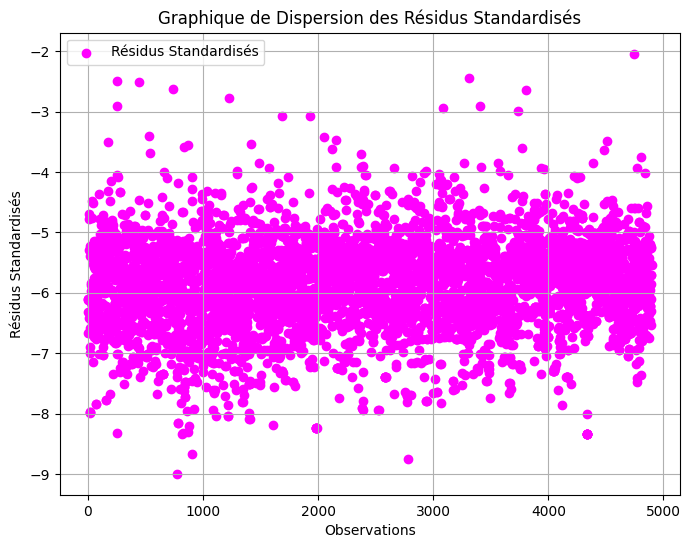

In [ ]:
#Visualisation des résidus après standardisation par un graphique en nuage de point
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residus_X)), residus_X, c='magenta', marker='o', label='Résidus Standardisés')
plt.xlabel('Observations')
plt.ylabel('Résidus Standardisés')
plt.title('Graphique de Dispersion des Résidus Standardisés')
plt.legend()
plt.grid(True)
plt.show()